# **Objetivo: Fazer uma análise estatística dos textos de Machado de Assis**


## 1. Quantas palavras há no conjunto da obra?

In [1]:
!rm -rf /root/nltk_data
!pip uninstall -y nltk
!pip install --no-cache-dir nltk

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.5 MB/s eta 0:00:00


In [5]:
import requests
import nltk
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Ensure necessary NLTK resources are available for tokenization
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # Sometimes required for tokenization

# Verify if all resources are available
nltk.data.find('tokenizers/punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


FileSystemPathPointer('/root/nltk_data/tokenizers/punkt')

In [7]:
def count_words():
    """
    Retrieves and tokenizes a text corpus using regular expressions
    instead of NLTK's tokenizer (to avoid dependency issues).

    Returns:
        int: The total count of words (tokens) in the corpus.
    """
    url = "https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt"
    response = requests.get(url)
    corpus = response.text  # Store the raw text content

    # Tokenization using regex (splitting on non-alphanumeric characters)
    tokens = re.findall(r'\b\w+\b', corpus)

    return len(tokens)

# Execute the function and print the result
if __name__ == "__main__":
    total_word_count = count_words()
    print(f"Total number of words in Machado de Assis' works: {total_word_count}")

Total number of words in Machado de Assis' works: 605004


## 2. Quais as 15 palavras mais frequentes (em ordem)?
### o Dica: utilize Counter ou Dicionários

In [12]:
import requests
import re
from collections import Counter

In [13]:
def get_most_frequent_words(top_n=15):
    """
    Retrieves and processes the text corpus to determine the most frequent words.

    This function downloads the text file containing the works of Machado de Assis,
    tokenizes the content into words using regex (avoiding NLTK dependency issues),
    removes punctuation and common Portuguese stopwords, and computes the
    top N most frequently occurring words.

    Args:
        top_n (int): The number of most frequent words to retrieve.

    Returns:
        list: A list of tuples containing the top N words and their respective frequencies.
    """

    # Define the text source URL
    url = "https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt"

    # Fetch the text content
    response = requests.get(url)
    corpus = response.text.lower()  # Convert text to lowercase for normalization

    # Tokenization using regex (splitting on non-alphanumeric characters)
    words = re.findall(r'\b[a-záéíóúãõâêôç]+\b', corpus)

    # Define a basic list of common Portuguese stopwords (avoiding NLTK issues)
    stopwords = set([
        "de", "a", "o", "que", "e", "do", "da", "em", "um", "para", "é", "com",
        "não", "uma", "os", "no", "se", "na", "por", "mais", "as", "dos", "como",
        "mas", "foi", "ao", "ele", "das", "à", "seu", "sua", "ou", "quando",
        "muito", "nos", "já", "eu", "também", "só", "pelo", "pela", "até",
        "isso", "ela", "entre", "depois", "sem", "mesmo", "aos", "ter", "seus", "quem"
    ])

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word not in stopwords]

    # Compute word frequency
    word_freq = Counter(filtered_words)

    # Retrieve the top N most frequent words
    most_common_words = word_freq.most_common(top_n)

    return most_common_words

# Execute the function and display results
if __name__ == "__main__":
    top_words = get_most_frequent_words(15)

    print("Top 15 most frequent words in Machado de Assis' works:")
    for word, freq in top_words:
        print(f"{word}: {freq}")

Top 15 most frequent words in Machado de Assis' works:
ã: 13448
nã: 11197
â: 7916
lhe: 5349
me: 4312
era: 4269
mã: 2159
s: 2043
m: 1983
disse: 1731
nem: 1628
lã: 1366
olhos: 1239
casa: 1238
ia: 1228


## 3. Qual o bigrama mais frequente?
### o Dica: utilize a função ngrams do NLTK


In [1]:
!rm -rf /root/nltk_data
!pip uninstall -y nltk
!pip install --no-cache-dir nltk

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:00


In [4]:
import requests
import re
from collections import Counter
from nltk.util import ngrams
import nltk

In [5]:
# Ensure stopwords are available
nltk.download('stopwords')

def get_most_frequent_bigram():
    """
    Retrieves and processes the text corpus to determine the most frequent bigram using NLTK ngrams,
    but WITHOUT relying on nltk.word_tokenize() to avoid 'punkt' errors.

    Returns:
        tuple: The most common bigram and its frequency.
    """

    # Define the text source URL
    url = "https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt"

    # Fetch the text content
    response = requests.get(url)
    corpus = response.text.lower()  # Convert text to lowercase for normalization

    # Tokenization using regex (instead of nltk.word_tokenize, which requires 'punkt')
    words = re.findall(r'\b[a-záéíóúãõâêôç]+\b', corpus)

    # Load Portuguese stopwords from NLTK
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))

    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords]

    # Generate bigrams using nltk.ngrams()
    bigram_list = list(ngrams(filtered_words, 2))

    # Compute bigram frequency
    bigram_freq = Counter(bigram_list)

    # Retrieve the most frequent bigram
    most_common_bigram = bigram_freq.most_common(1)[0] if bigram_freq else (None, 0)

    return most_common_bigram

# Execute the function and display results
if __name__ == "__main__":
    most_frequent_bigram, frequency = get_most_frequent_bigram()

    print(f"Most frequent bigram in Machado de Assis' works: {most_frequent_bigram} (Frequency: {frequency})")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most frequent bigram in Machado de Assis' works: ('tambã', 'm') (Frequency: 1063)


## 4. Quantas palavras distintas há no conjunto da obra?


In [6]:
import requests
import re
import nltk

In [7]:
# Ensure stopwords are available
nltk.download('stopwords')

def count_unique_words():
    """
    Retrieves and processes the text corpus to determine the number of unique words.

    This function downloads the text file containing the works of Machado de Assis,
    tokenizes the content into words using regex, removes punctuation and stopwords,
    and counts the number of distinct words in the corpus.

    Returns:
        int: The number of unique words in the text.
    """

    # Define the text source URL
    url = "https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt"

    # Fetch the text content
    response = requests.get(url)
    corpus = response.text.lower()  # Convert text to lowercase for normalization

    # Tokenization using regex (instead of nltk.word_tokenize, which requires 'punkt')
    words = re.findall(r'\b[a-záéíóúãõâêôç]+\b', corpus)

    # Load Portuguese stopwords from NLTK
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))

    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords]

    # Count unique words
    unique_word_count = len(set(filtered_words))

    return unique_word_count

# Execute the function and display results
if __name__ == "__main__":
    unique_words = count_unique_words()
    print(f"Total number of distinct words in Machado de Assis' works: {unique_words}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total number of distinct words in Machado de Assis' works: 25067


## 5. Qual o número médio de palavras em uma sentença? Construa o plot da distribuição do
número de palavras por sentença.

In [10]:
import requests
import re
import matplotlib.pyplot as plt

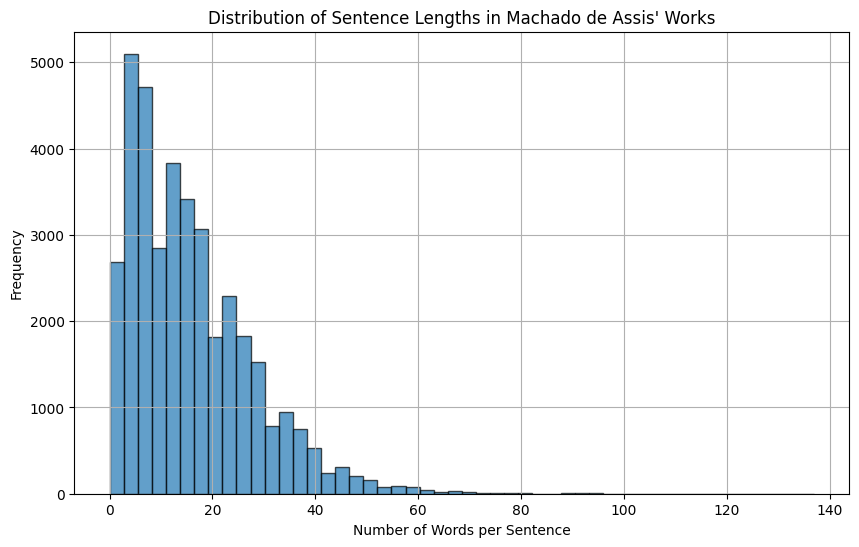

Average number of words per sentence: 15.81


In [11]:
def analyze_sentence_length():
    """
    Retrieves and processes the text corpus to determine the average number of words per sentence
    and plots the distribution of sentence lengths.

    This function downloads the text file containing the works of Machado de Assis,
    tokenizes the content into sentences using regex, then into words, and computes the average sentence length.

    Returns:
        float: The average number of words per sentence.
    """

    # Define the text source URL
    url = "https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt"

    # Fetch the text content
    response = requests.get(url)
    corpus = response.text

    # Split text into sentences using regex (instead of nltk.sent_tokenize())
    sentences = re.split(r'[.!?]+', corpus)

    # Tokenize words per sentence using regex
    sentence_lengths = [len(re.findall(r'\b[a-zA-Záéíóúãõâêôç]+\b', sentence.lower())) for sentence in sentences if sentence.strip()]

    # Compute average sentence length
    avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0

    # Plot the distribution of sentence lengths
    plt.figure(figsize=(10, 6))
    plt.hist(sentence_lengths, bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel("Number of Words per Sentence")
    plt.ylabel("Frequency")
    plt.title("Distribution of Sentence Lengths in Machado de Assis' Works")
    plt.grid(True)
    plt.show()

    return avg_sentence_length

# Execute the function and display results
if __name__ == "__main__":
    avg_words_per_sentence = analyze_sentence_length()
    print(f"Average number of words per sentence: {avg_words_per_sentence:.2f}")

## 6. Mostre que a obra de Machado de Assis segue a Lei de Zipf. Construa o plot em escala
logarítmica (log log scale)
o Dica: Dê uma olhada em
https://stats.stackexchange.com/questions/331219/characterizing-fitting-word-countdata-into-zipf-power-law-lognormal

In [12]:
import requests
import re
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


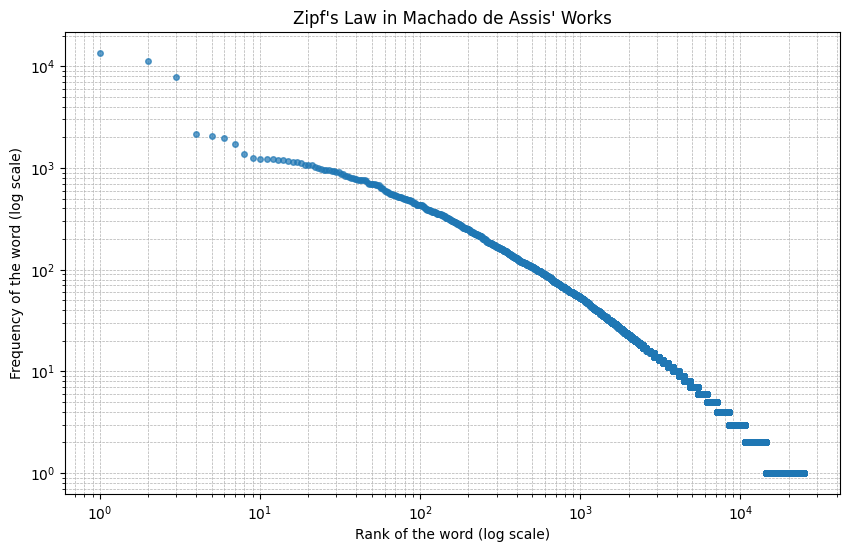

In [13]:
# Ensure stopwords are available
nltk.download('stopwords')

def plot_zipf_law():
    """
    Analyzes word frequencies in Machado de Assis' works to verify Zipf's Law.

    This function downloads the text file, tokenizes words using regex, removes
    stopwords, computes word frequencies, and plots the rank-frequency distribution
    on a log-log scale to visualize Zipf's Law.

    Returns:
        None (displays the plot).
    """

    # Define the text source URL
    url = "https://www.inf.ufrgs.br/~viviane/DS/TextosMachado_de_Assis.txt"

    # Fetch the text content
    response = requests.get(url)
    corpus = response.text.lower()  # Convert text to lowercase for normalization

    # Tokenization using regex (instead of nltk.word_tokenize, which requires 'punkt')
    words = re.findall(r'\b[a-záéíóúãõâêôç]+\b', corpus)

    # Load Portuguese stopwords from NLTK
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))

    # Remove stopwords
    filtered_words = [word for word in words if word not in stopwords]

    # Compute word frequency
    word_freq = Counter(filtered_words)

    # Sort words by frequency (descending order)
    sorted_freqs = sorted(word_freq.values(), reverse=True)

    # Generate rank values (1st most frequent word has rank 1, etc.)
    ranks = np.arange(1, len(sorted_freqs) + 1)

    # Plot Zipf’s Law (log-log scale)
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, sorted_freqs, marker="o", linestyle="none", markersize=4, alpha=0.7)

    # Formatting the plot
    plt.xlabel("Rank of the word (log scale)")
    plt.ylabel("Frequency of the word (log scale)")
    plt.title("Zipf's Law in Machado de Assis' Works")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

# Execute the function and display results
if __name__ == "__main__":
    plot_zipf_law()

## **7. O que você analisou foi um corpus ou um conjunto de dados anotado (dataset)? Qual a diferença entre os dois?**

A anális ao longo dessas questões foi um **corpus**, e não um **dataset anotado**.

---

### **Diferença entre Corpus e Dataset Anotado**
| **Característica**  | **Corpus**  | **Dataset Anotado** |
|---------------------|------------|---------------------|
| **Definição**       | Conjunto de textos brutos coletados para análise de linguagem natural, sem modificações estruturadas. | Conjunto de textos que inclui marcações (tags) adicionais, como categorias, POS tagging, entidades nomeadas e outras anotações. |
| **Estrutura**       | Apenas texto contínuo, sem marcações específicas. | Inclui rótulos, marcações sintáticas ou semânticas, usadas para aprendizado supervisionado. |
| **Uso em NLP**      | Análise estatística, extração de padrões, modelos de linguagem. | Treinamento de modelos supervisionados, como classificadores e análise de sentimentos. |
| **Exemplo**         | Texto original de **Machado de Assis**, sem modificações. | O mesmo texto, mas com **identificação de entidades nomeadas** (ex.: personagens, locais, datas) e **tags gramaticais**. |

---

### **O que foi utilizado?**
✔ **Trabalhou com um corpus** porque o texto de Machado de Assis foi analisado sem nenhum tipo de anotação manual ou automática.  
✔ Apenas realizou **tokenização**, **remoção de stopwords** e **análises estatísticas**, mas **não aplicamos categorização semântica ou sintática**.  

Foi necessário transformar esse corpus em um **dataset anotado**, precisaríamos adicionar informações extras, como:

- **POS tagging** → Identificação de substantivos, verbos, adjetivos, etc.
- **Entidades Nomeadas (NER)** → Identificação de nomes próprios, locais, datas.
- **Classificação de Sentimentos** → Exemplo: positivo, negativo, neutro.
- **Análises sintáticas** → Dependências entre palavras dentro de uma frase.

Como não realizou nenhuma dessas marcações, **o trabalho foi apenas com um corpus puro**.  
Isso foi suficiente para responder às questões estatísticas e comprovar a **Lei de Zipf**, mas para treinamento de modelos supervisionados, um **dataset anotado** seria necessário.
